## Introduction
This notebook reproduces the sensitivity analysis reported in Noble et al. (2023) 10.26434/chemrxiv-2023-d22xj
<br> Although we have provided ranges for a number of process assumptions, we have shared the original code for producing this figure with the hope that readers will critically evaluate the assumptions and test their own scenarios for ore prices, capital costs, energy efficiency, electricity prices, etc...
<br>Contact pkempler@uoregon.edu with questions or suggestions for the technoeconomic analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Chlor_Iron_Model import LCOFe, base_case_EP, base_case_Cl2P

from matplotlib.ticker import AutoMinorLocator

In [2]:
LCOFe()

695.0153365436083

### Generate plot of of Levelized Cost of Fe for various electricity prices and plant capacity factors

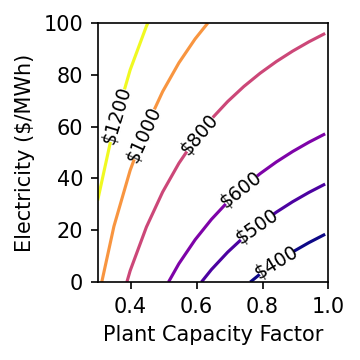

In [3]:
# Set up a mesh grid for desired variables
EPs = np.linspace(0,100,15)
PlantCaps = np.linspace(0.3,0.99,15)
XX,YY = np.meshgrid(EPs,PlantCaps) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(PlantCaps)):
    for col in range(0,len(EPs)):
            p_elec = XX[row,col]
            Cap = YY[row,col]
            Z[row,col] = LCOFe(EP=p_elec, plantcap=Cap)
            
fig1, ax1 = plt.subplots(figsize=(2.5,2.5),dpi=300)

CS = ax1.contour(YY, XX, Z, [400,500,600,800,1000,1200], cmap='plasma')

ax1.set_ylabel('Electricity ($/MWh)')
plt.xlabel('Plant Capacity Factor')
ax1.set_xticks([0.4,0.6,0.8,1.0])
ax1.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
plt.gcf().set_dpi(150)

fig1.tight_layout()
#fig.savefig('powercost_vs_plantcapacity.png')

### Generate a plot of Levelized Cost of Fe for various ore prices and Fe selectivity 

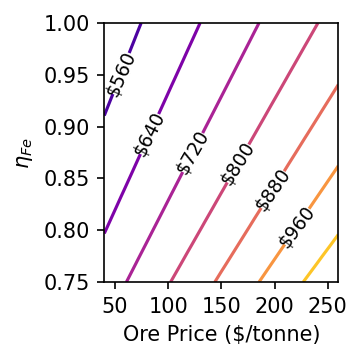

In [4]:
## Set up a mesh grid for desired variables
ores = np.linspace(40,260,15)
Etas = np.linspace(0.75,1.0,15)
XX,YY = np.meshgrid(ores,Etas) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

#Run models
for row in range(0,len(Etas)):
    for col in range(0,len(ores)):
            p_ore = XX[row,col]
            Eta = YY[row,col]
            Z[row,col] = LCOFe(ore=p_ore, FeCap=Eta)
            
fig2, ax2 = plt.subplots(figsize=(2.5,2.5),dpi=300)

#Plot data
CS = ax2.contour(XX, YY, Z, cmap='plasma')
ax2.set_xlabel('Ore Price ($/tonne)')
ax2.set_xticks([50,100,150,200,250])
plt.ylabel('$\eta_{Fe}$')
ax2.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
plt.gcf().set_dpi(150)

fig2.tight_layout()

#fig.savefig('oreprice_vs_selectivity.png')

In [5]:
print(LCOFe(ore=70,FeCap=0.8))
print(LCOFe(ore=140,FeCap=0.95))

691.639546030332
688.8364940160424


### Generate a plot of Levelized Cost of Fe for an O2 evolving cell 

#### Optional: with NaOH sale

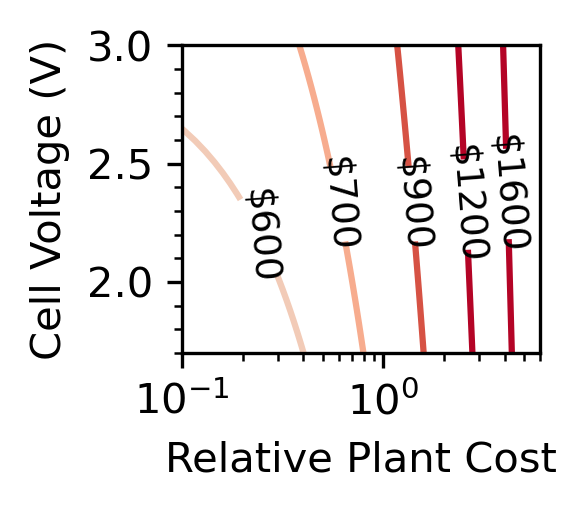

In [6]:
## Set up a mesh grid for desired variables
Capital = np.linspace(0.1,6,10)
Cells = np.linspace(1.7,3,30)
XX,YY = np.meshgrid(Capital,Cells) # syntax is columns, rows
rs, cs = np.shape(XX)
Z_naoh = np.zeros((rs,cs))
Z_null = np.zeros((rs,cs))

fig3, ax3 = plt.subplots(figsize=(2,1.8),dpi=300)

## With NaOH co-sale
for row in range(0,len(Cells)):
    for col in range(0,len(Capital)):
            plant_cost = XX[row,col]
            cell_voltage = YY[row,col]
            Z_null[row,col] = LCOFe(plantfac=plant_cost,CV=cell_voltage, 
                   Cl2Cap=0, NaCap=0, EP=50)

CS_null = ax3.contour(XX, YY, Z_null, [600, 700, 900, 1200, 1600],
                      vmin = 0, vmax = 1000, cmap='coolwarm')

ax3.clabel(CS_null, inline=True, fontsize=9, colors='k', fmt='$%1.0f')

# Enable minor ticks on the y-axis
ax3.yaxis.set_minor_locator(AutoMinorLocator())

ax3.set_xscale('log')
ax3.set_xlabel('Relative Plant Cost')
ax3.set_ylabel('Cell Voltage (V)')

fig3.tight_layout()

In [7]:
#fig3.savefig('NoCl2_CapEx vs Voltage_large.png',transparent=True)

### Generate a plot of Levelized Cost of Fe for a Cl2 evolving cell

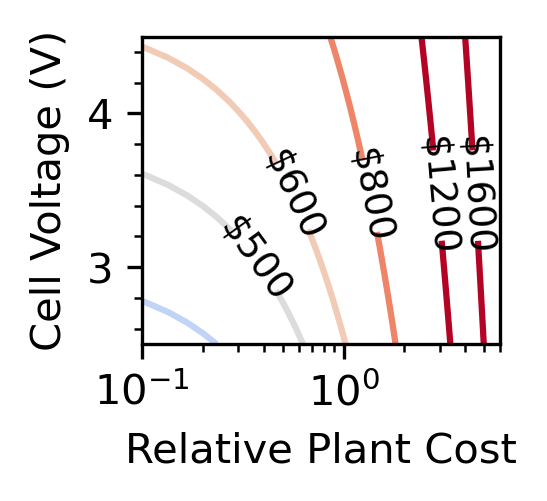

In [8]:
## Set up a mesh grid for desired variables
Capital = np.linspace(0.1,6,10)
Cells = np.linspace(2.5,4.5,30)
XX,YY = np.meshgrid(Capital,Cells) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(Cells)):
    for col in range(0,len(Capital)):
            plant_cost = XX[row,col]
            cell_voltage = YY[row,col]
            Z[row,col] = LCOFe(plantfac=plant_cost,CV=cell_voltage, Cl2Cap=1)

fig4, ax4 = plt.subplots(figsize=(2,1.8),dpi=300)

CS = ax4.contour(XX, YY, Z, [400, 500, 600, 800, 1200, 1600, 2200], 
                 vmin = 0, vmax = 1000, cmap='coolwarm')

ax4.set_xscale('log')
ax4.set_xlabel('Relative Plant Cost')
ax4.set_ylabel('Cell Voltage (V)')

# Enable minor ticks on the y-axis
ax4.yaxis.set_minor_locator(AutoMinorLocator())

ax4.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')

fig4.tight_layout()

In [9]:
#fig4.savefig('ChlorIron_CapEx vs Voltage_large.png',transparent=True)

### Generate a plot of employees and capital costs

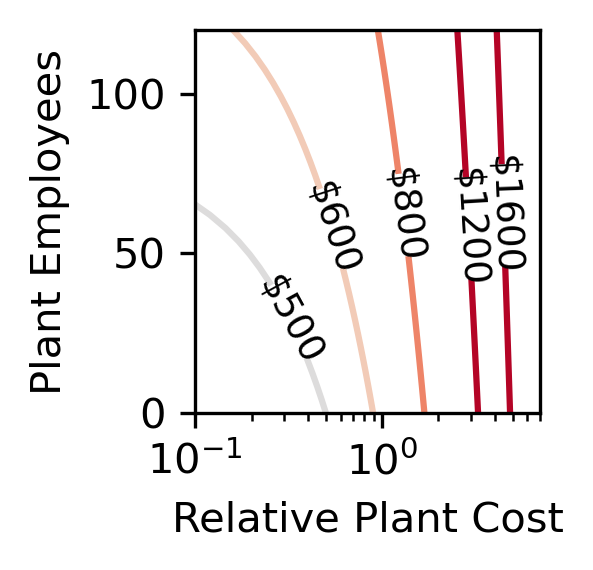

In [10]:
## Set up a mesh grid for desired variables
Capital = np.linspace(0.1,7,30)
N_E = np.linspace(0,120,30)
XX,YY = np.meshgrid(Capital,N_E) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(N_E)):
    for col in range(0,len(Capital)):
            plant_cost = XX[row,col]
            N = YY[row,col]
            Z[row,col] = LCOFe(plantfac=plant_cost,var_employee=N)

fig5, ax5 = plt.subplots(figsize=(2,2),dpi=300)

CS = ax5.contour(XX, YY, Z, [500,600,800,1200,1600],
                 vmin = 0, vmax = 1000, cmap='coolwarm')

# ax.plot(400000/0.516,3.2,'*',color='skyblue',markersize=10)
# ax.text(500000,3.4,'Chlor-iron',color='skyblue', rotation=-80)

ax5.set_xscale('log')
ax5.set_xlabel('Relative Plant Cost')
ax5.set_ylabel('Plant Employees')
ax5.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')

fig5.tight_layout()

### Compare electricity price and chlorine price

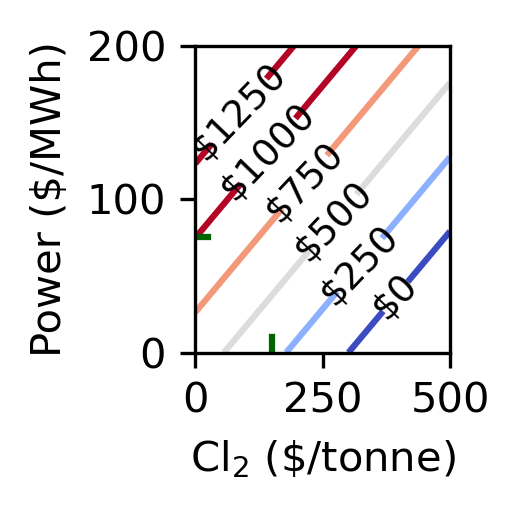

In [11]:
# Set up a mesh grid for desired variables
EPs = np.linspace(0,200,15)
Cl2_Ps = np.linspace(0,500,15)
XX,YY = np.meshgrid(EPs,Cl2_Ps) # syntax is columns, rows
rs, cs = np.shape(XX)
Z = np.zeros((rs,cs))

for row in range(0,len(Cl2_Ps)):
    for col in range(0,len(EPs)):
            p_elec = XX[row,col]
            p_Cl2 = YY[row,col]
            Z[row,col] = LCOFe(EP=p_elec, Cl2P=p_Cl2)
            
fig6, ax6 = plt.subplots(figsize=(1.7,1.8),dpi=300)

ax6.plot([0,50/2],[base_case_EP]*2,'-',color='darkgreen')
ax6.plot([base_case_Cl2P]*2,[0,20/2],'-',color='darkgreen')

CS = ax6.contour(YY, XX, Z, [0,250,500,750,1000,1250], 
                vmin = 0, vmax = 1000, cmap='coolwarm')

ax6.set_ylabel('Power ($/MWh)')
plt.xlabel('Cl$_2$ (\$/tonne)')
ax6.clabel(CS, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
plt.gcf().set_dpi(300)

fig6.tight_layout()

#fig6.savefig('EP vs Cl2P.png')

### Generate a plot comparing the impact of reduced cell voltage on the levelized cost of iron

In [12]:
## Set up a mesh grid for desired variables
Cl2Cap = np.linspace(0,1,15)
Cells = np.linspace(1.5,4,30)
XX,YY = np.meshgrid(Cl2Cap,Cells) # syntax is columns, rows
rs, cs = np.shape(XX)

Z0 = np.zeros((rs,cs))
Z1 = np.zeros((rs,cs))
Z2 = np.zeros((rs,cs))
Z3 = np.zeros((rs,cs))

for row in range(0,len(Cells)):
    for col in range(0,len(Cl2Cap)):
            cap = XX[row,col]
            cell_voltage = YY[row,col]
            Z0[row,col] = LCOFe(CV=cell_voltage, Cl2Cap=cap, NaCap=0, EP=0)
            Z1[row,col] = LCOFe(CV=cell_voltage, Cl2Cap=cap, NaCap=0, EP=25)
            Z2[row,col] = LCOFe(CV=cell_voltage, Cl2Cap=cap, NaCap=0, EP=base_case_EP)
            Z3[row,col] = LCOFe(CV=cell_voltage, Cl2Cap=cap, NaCap=0, EP=150)

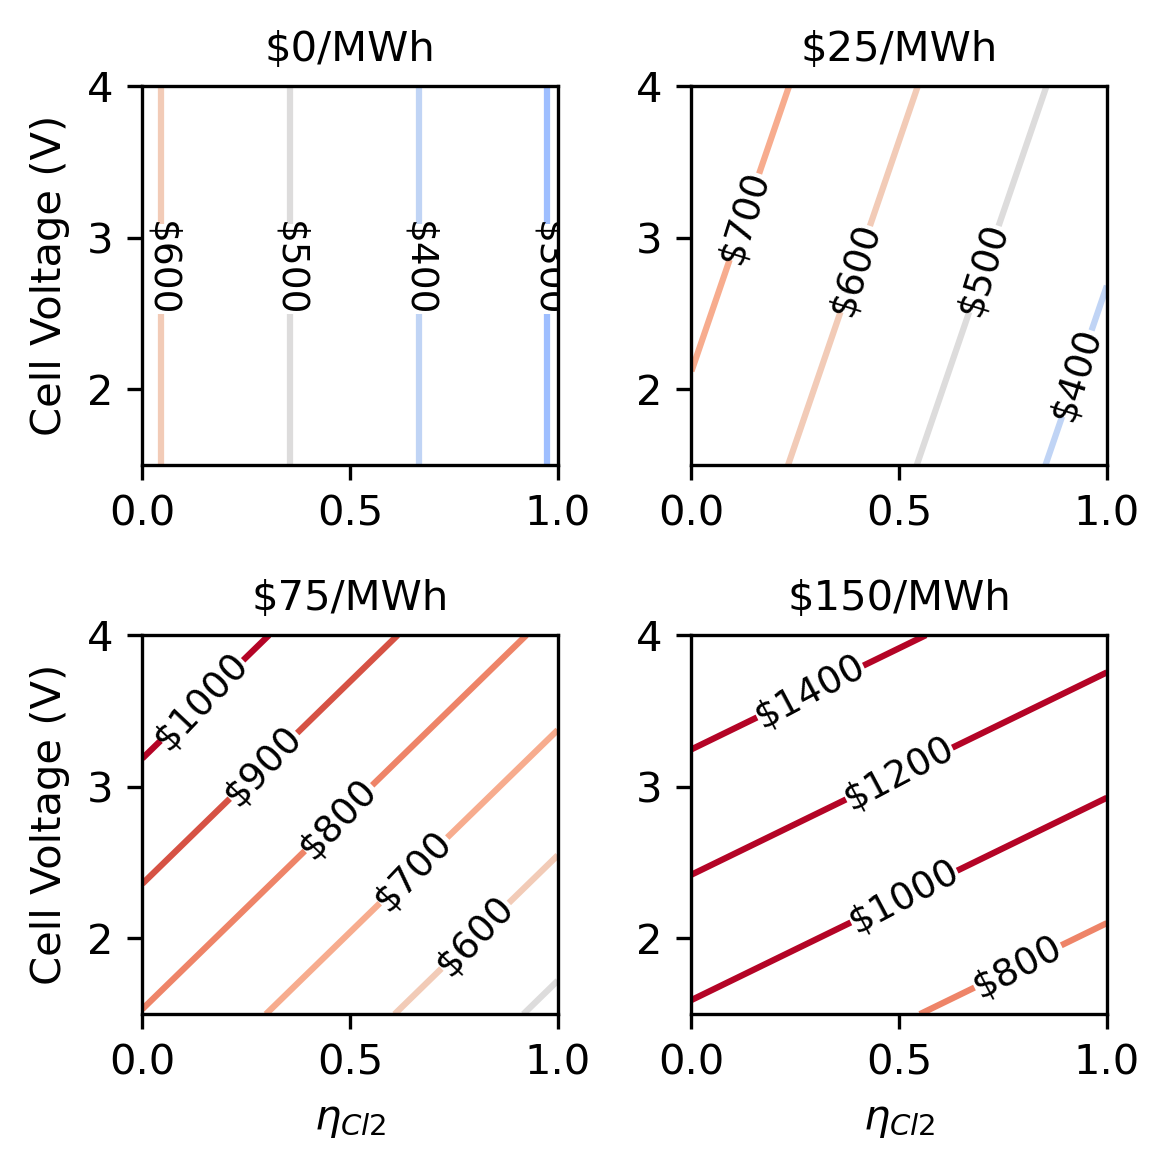

In [13]:
fig_all, ax_all = plt.subplots(2,2, figsize=(4,4),dpi=300)

lines = np.linspace(100,1500,15)
c0 = ax_all[0,0].contour(XX, YY, Z0, lines, vmin = 0, vmax = 1000, cmap='coolwarm')
c1 = ax_all[0,1].contour(XX, YY, Z1, lines, vmin = 0, vmax = 1000, cmap='coolwarm')
c2 = ax_all[1,0].contour(XX, YY, Z2, lines, vmin = 0, vmax = 1000, cmap='coolwarm')
c3 = ax_all[1,1].contour(XX, YY, Z3, [800,1000,1200,1400], vmin = 0, vmax = 1000, cmap='coolwarm')

ax_all[0,0].clabel(c0, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
ax_all[0,0].set_title('$0/MWh', fontsize=10)
ax_all[0,1].clabel(c1, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
ax_all[0,1].set_title('$25/MWh', fontsize=10)
ax_all[1,0].clabel(c2, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
ax_all[1,0].set_title('$75/MWh', fontsize=10)
ax_all[1,1].clabel(c3, inline=True, fontsize=9, colors='k', fmt='$%1.0f')
ax_all[1,1].set_title('$150/MWh', fontsize=10)

ax_all[1,0].set_xlabel('$\eta_{Cl2}$')
ax_all[1,1].set_xlabel('$\eta_{Cl2}$')

ax_all[0,0].set_ylabel('Cell Voltage (V)')
ax_all[1,0].set_ylabel('Cell Voltage (V)')

for axrow in ax_all:
    for ax in axrow:
        ax.set_yticks([2,3,4])

fig_all.tight_layout()

#fig_all.savefig('Chlorine vs Cell V.png')

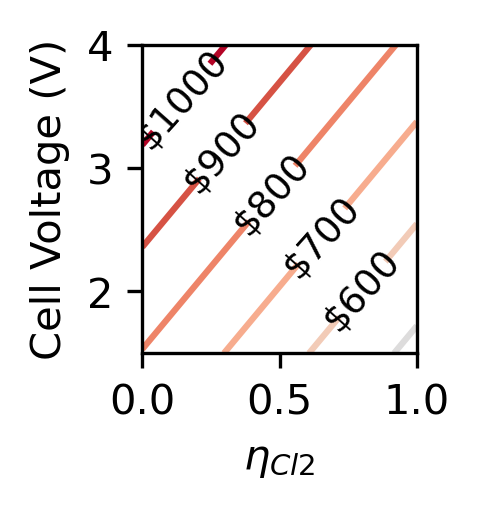

In [14]:
fig75, ax75 = plt.subplots(figsize=(1.7,1.8),dpi=300)

lines = np.linspace(100,1500,15)

c2 = ax75.contour(XX, YY, Z2, lines, vmin = 0, vmax = 1000, cmap='coolwarm')
ax75.clabel(c2, inline=True, fontsize=9, colors='k', fmt='$%1.0f')

ax75.set_xlabel('$\eta_{Cl2}$')
ax75.set_ylabel('Cell Voltage (V)')

ax75.set_yticks([2,3,4])

fig75.tight_layout()

#fig75.savefig('Chlorine vs Cell V_75pMWh.png')